# Data Visualization


In [15]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

sns.set(style="whitegrid")
df = pd.read_csv("merged_cleaned_data.csv")

df["PM2.5"] = pd.to_numeric(df["PM2.5"], errors="coerce")
df["NO2"] = pd.to_numeric(df["NO2"], errors="coerce")
df["Depression (%)"] = pd.to_numeric(df["Depression (%)"], errors="coerce")
df["Anxiety disorders (%)"] = pd.to_numeric(df["Anxiety disorders (%)"], errors="coerce")
df.dropna(subset=["Country", "PM2.5", "NO2", "Depression (%)", "Anxiety disorders (%)"], inplace=True)
df["Pollution_Avg"] = (df["PM2.5"] + df["NO2"]) / 2

country_avg = df.groupby("Country").agg({
    "PM2.5": "mean",
    "NO2": "mean",
    "Pollution_Avg": "mean",
    "Depression (%)": "mean",
    "Anxiety disorders (%)": "mean"
}).reset_index()


## PM2.5 vs Depression (%)

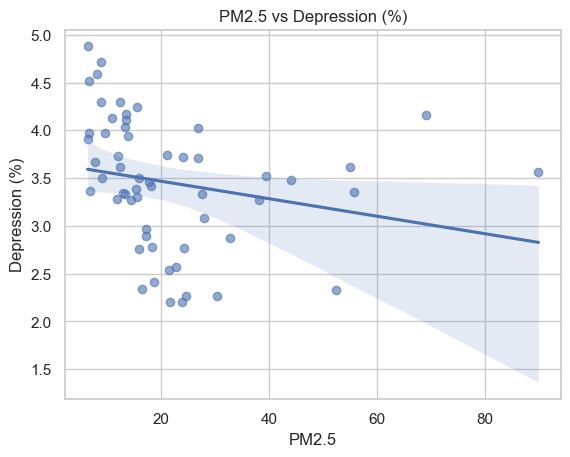

Pearson Correlation (r): -0.22 | p-value: 0.09918


In [16]:

sns.regplot(data=country_avg, x="PM2.5", y="Depression (%)", scatter_kws={'alpha':0.6})
plt.title("PM2.5 vs Depression (%)")
plt.show()

r, p = pearsonr(country_avg["PM2.5"], country_avg["Depression (%)"])
print("Pearson Correlation (r):", round(r, 2), "| p-value:", round(p, 5))


## PM2.5 vs Anxiety disorders (%)

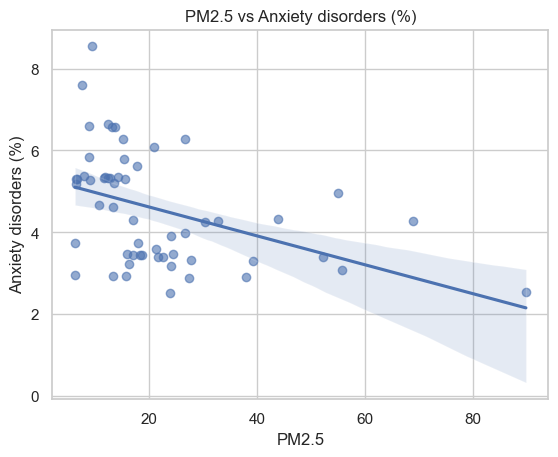

Pearson Correlation (r): -0.42 | p-value: 0.0011


In [17]:

sns.regplot(data=country_avg, x="PM2.5", y="Anxiety disorders (%)", scatter_kws={'alpha':0.6})
plt.title("PM2.5 vs Anxiety disorders (%)")
plt.show()

r, p = pearsonr(country_avg["PM2.5"], country_avg["Anxiety disorders (%)"])
print("Pearson Correlation (r):", round(r, 2), "| p-value:", round(p, 5))


## NO2 vs Depression (%)

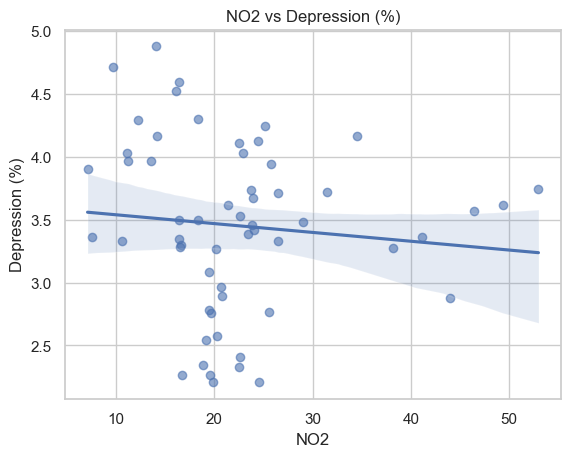

Pearson Correlation (r): -0.1 | p-value: 0.45469


In [18]:

sns.regplot(data=country_avg, x="NO2", y="Depression (%)", scatter_kws={'alpha':0.6})
plt.title("NO2 vs Depression (%)")
plt.show()

r, p = pearsonr(country_avg["NO2"], country_avg["Depression (%)"])
print("Pearson Correlation (r):", round(r, 2), "| p-value:", round(p, 5))


## NO2 vs Anxiety disorders (%)

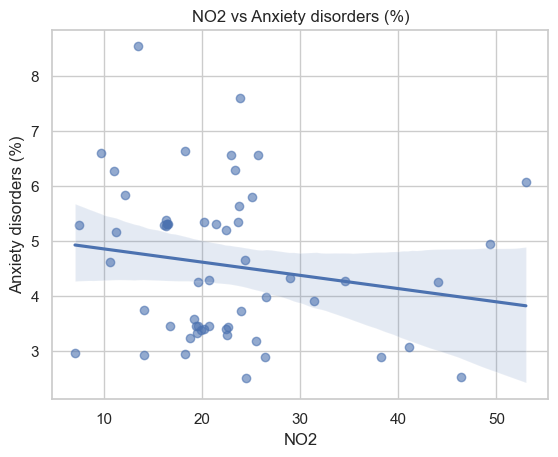

Pearson Correlation (r): -0.17 | p-value: 0.20127


In [19]:

sns.regplot(data=country_avg, x="NO2", y="Anxiety disorders (%)", scatter_kws={'alpha':0.6})
plt.title("NO2 vs Anxiety disorders (%)")
plt.show()

r, p = pearsonr(country_avg["NO2"], country_avg["Anxiety disorders (%)"])
print("Pearson Correlation (r):", round(r, 2), "| p-value:", round(p, 5))


## Pollution_Avg vs Depression (%)

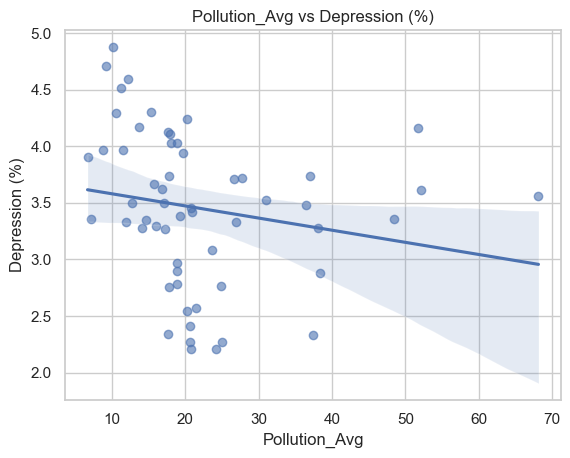

Pearson Correlation (r): -0.19 | p-value: 0.1554


In [20]:

sns.regplot(data=country_avg, x="Pollution_Avg", y="Depression (%)", scatter_kws={'alpha':0.6})
plt.title("Pollution_Avg vs Depression (%)")
plt.show()

r, p = pearsonr(country_avg["Pollution_Avg"], country_avg["Depression (%)"])
print("Pearson Correlation (r):", round(r, 2), "| p-value:", round(p, 5))


## Pollution_Avg vs Anxiety disorders (%)

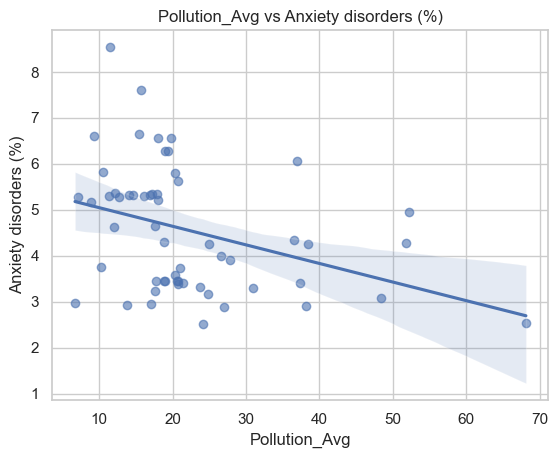

Pearson Correlation (r): -0.36 | p-value: 0.00664


In [21]:

sns.regplot(data=country_avg, x="Pollution_Avg", y="Anxiety disorders (%)", scatter_kws={'alpha':0.6})
plt.title("Pollution_Avg vs Anxiety disorders (%)")
plt.show()

r, p = pearsonr(country_avg["Pollution_Avg"], country_avg["Anxiety disorders (%)"])
print("Pearson Correlation (r):", round(r, 2), "| p-value:", round(p, 5))


## 📊 Bar Charts

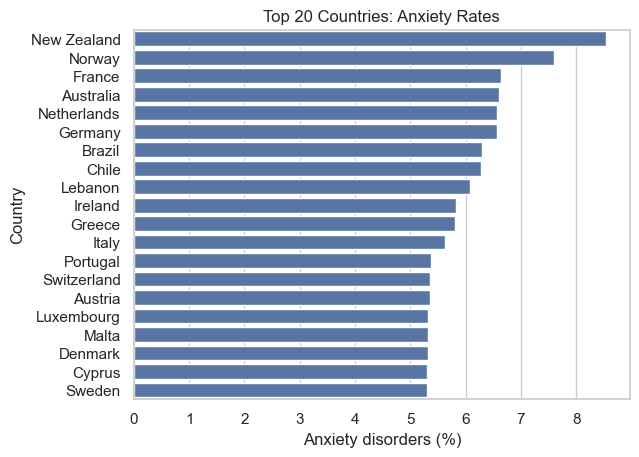

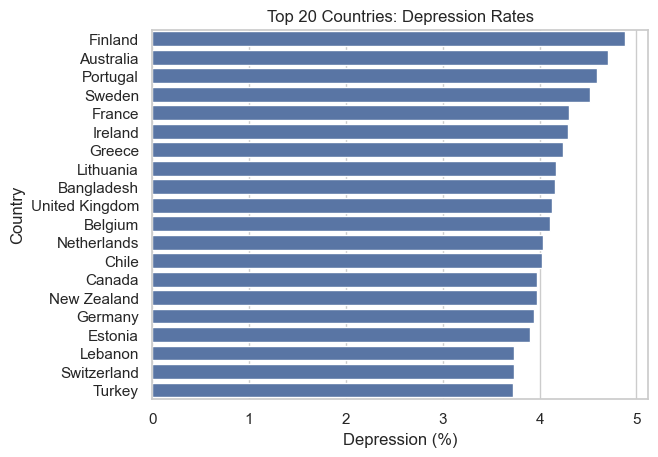

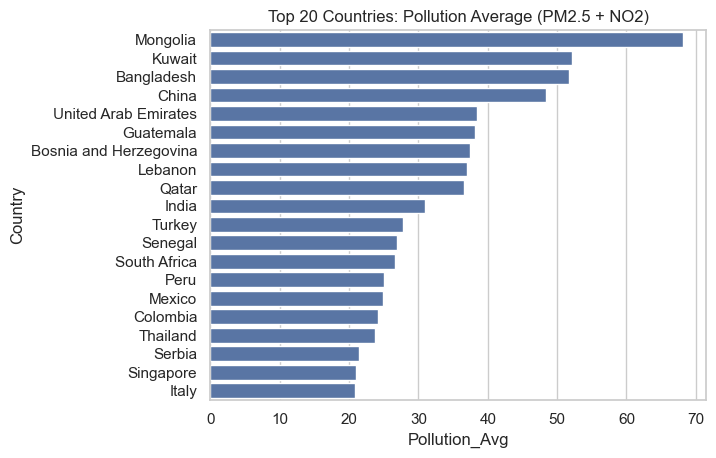

In [22]:

# Top 20 Countries by Anxiety Rates
top_anxiety = country_avg.sort_values("Anxiety disorders (%)", ascending=False).head(20)
sns.barplot(data=top_anxiety, x="Anxiety disorders (%)", y="Country")
plt.title("Top 20 Countries: Anxiety Rates")
plt.show()

# Top 20 Countries by Depression Rates
top_depression = country_avg.sort_values("Depression (%)", ascending=False).head(20)
sns.barplot(data=top_depression, x="Depression (%)", y="Country")
plt.title("Top 20 Countries: Depression Rates")
plt.show()

# Top 20 Countries by Weighted Pollution Average (PM2.5 + NO2)
top_pollution = country_avg.sort_values("Pollution_Avg", ascending=False).head(20)
sns.barplot(data=top_pollution, x="Pollution_Avg", y="Country")
plt.title("Top 20 Countries: Pollution Average (PM2.5 + NO2)")
plt.show()


/opt/anaconda3/envs/DSA201/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/opt/anaconda3/envs/DSA201/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

<Figure size 1000x600 with 0 Axes>

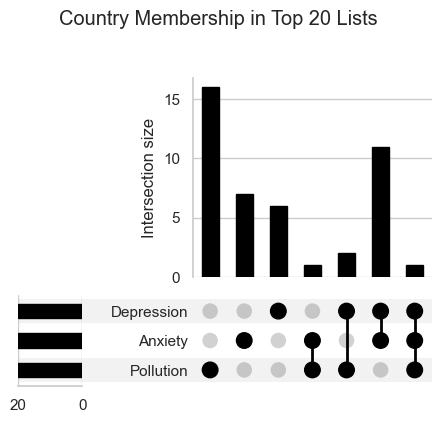

In [26]:
from upsetplot import UpSet, from_indicators
import matplotlib.pyplot as plt

# Create a DataFrame indicating True/False presence for each category
country_df = pd.DataFrame(index=list(all_countries))
country_df["Pollution"] = country_df.index.isin(top_pollution["Country"])
country_df["Anxiety"] = country_df.index.isin(top_anxiety["Country"])
country_df["Depression"] = country_df.index.isin(top_depression["Country"])

# Convert boolean indicators to format for upsetplot
data = from_indicators(country_df)

# Plot
plt.figure(figsize=(10, 6))
UpSet(data, subset_size='count').plot()
plt.suptitle("Country Membership in Top 20 Lists", y=1.05)
plt.show()


/opt/anaconda3/envs/DSA201/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/opt/anaconda3/envs/DSA201/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

<Figure size 1000x600 with 0 Axes>

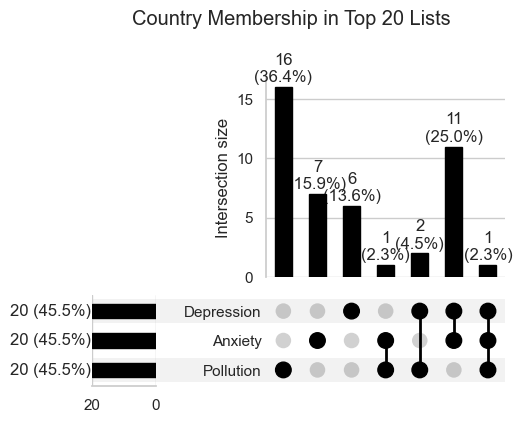

Countries in All Three Categories: ['Lebanon']


In [28]:
from upsetplot import UpSet, from_indicators
import matplotlib.pyplot as plt

# ✅ Create a DataFrame with Boolean columns for UpSet plotting
all_countries = set(top_pollution["Country"]) | set(top_anxiety["Country"]) | set(top_depression["Country"])
country_df = pd.DataFrame({"Country": list(all_countries)})

country_df["Pollution"] = country_df["Country"].isin(top_pollution["Country"])
country_df["Anxiety"] = country_df["Country"].isin(top_anxiety["Country"])
country_df["Depression"] = country_df["Country"].isin(top_depression["Country"])

# ✅ Use from_indicators (not from_memberships)
indicator_data = from_indicators(["Pollution", "Anxiety", "Depression"], country_df)

# ✅ Plot with UpSet
plt.figure(figsize=(10, 6))
UpSet(
    indicator_data,
    subset_size='count',
    show_counts=True,
    show_percentages=True
).plot()
plt.suptitle("Country Membership in Top 20 Lists", y=1.05)
plt.show()

# ✅ Optional: print overlapping sets
print("Countries in All Three Categories:", list(
    set(top_pollution["Country"]) & set(top_anxiety["Country"]) & set(top_depression["Country"])
))


## 🐱 Catplot

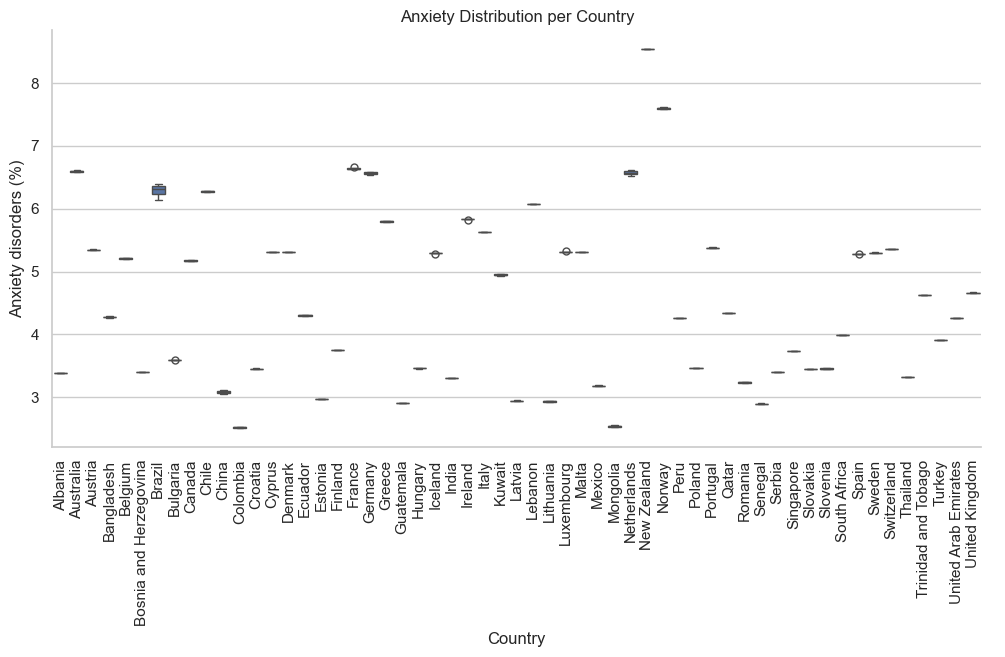

In [ ]:

sns.catplot(data=df, x="Country", y="Anxiety disorders (%)", kind="box", height=5, aspect=2)
plt.xticks(rotation=90)
plt.title("Anxiety Distribution per Country")
plt.show()


## ✴️ Scatterplots

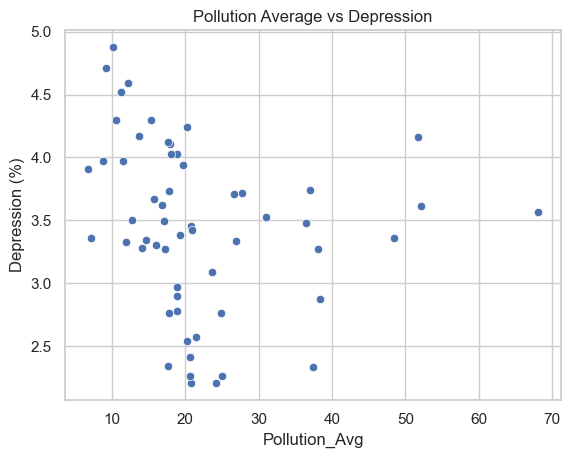

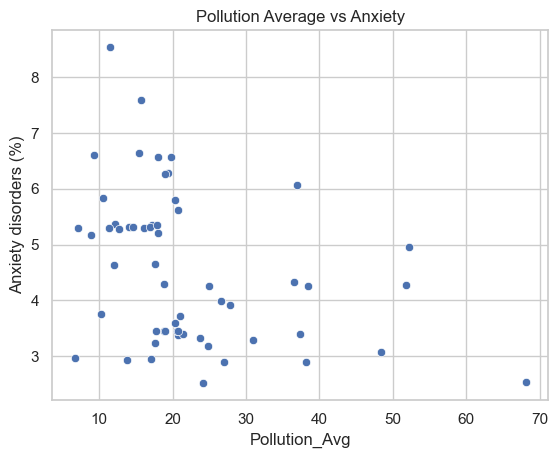

In [ ]:

sns.scatterplot(data=country_avg, x="Pollution_Avg", y="Depression (%)")
plt.title("Pollution Average vs Depression")
plt.show()

sns.scatterplot(data=country_avg, x="Pollution_Avg", y="Anxiety disorders (%)")
plt.title("Pollution Average vs Anxiety")
plt.show()


## 📦 Boxplot

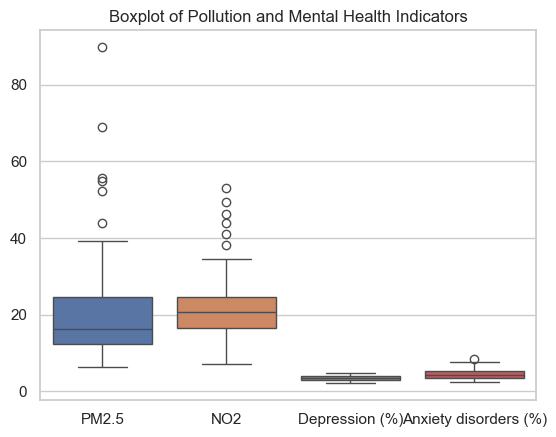

In [ ]:

sns.boxplot(data=country_avg[["PM2.5", "NO2", "Depression (%)", "Anxiety disorders (%)"]])
plt.title("Boxplot of Pollution and Mental Health Indicators")
plt.show()


## 📈 Histograms

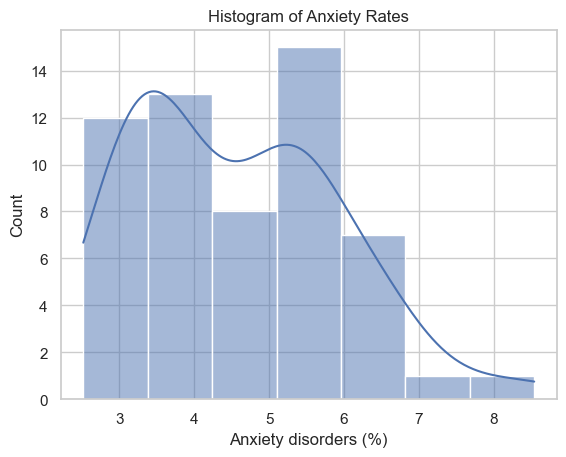

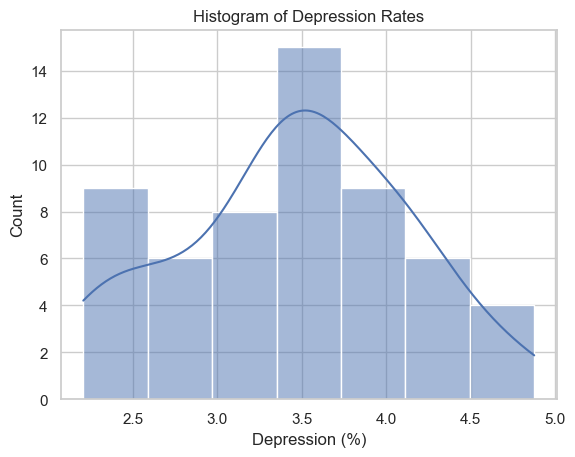

In [ ]:

sns.histplot(data=country_avg["Anxiety disorders (%)"], kde=True)
plt.title("Histogram of Anxiety Rates")
plt.show()

sns.histplot(data=country_avg["Depression (%)"], kde=True)
plt.title("Histogram of Depression Rates")
plt.show()


## 🔥 Heatmap

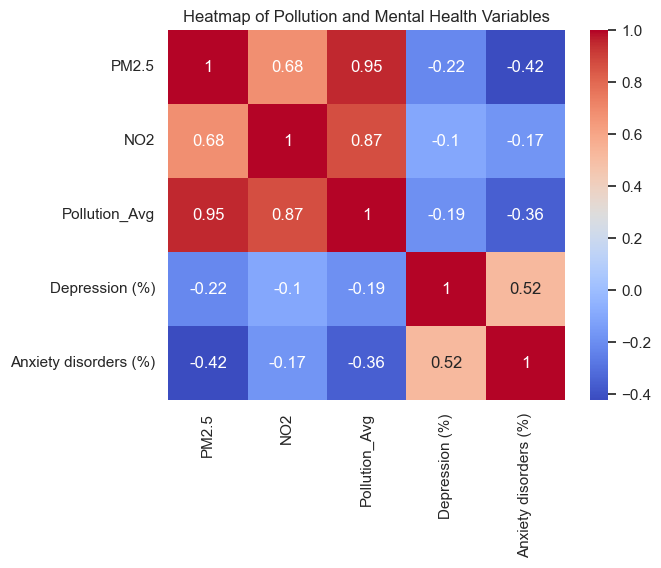

In [ ]:

sns.heatmap(country_avg[["PM2.5", "NO2", "Pollution_Avg", "Depression (%)", "Anxiety disorders (%)"]].corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap of Pollution and Mental Health Variables")
plt.show()
